# <span style="color: green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color: blue">  Esercitazione 12</span>

## Machine Learning(ML): classificazione con reti neurali profonde (DNNs) e con reti neurali convoluzionali (CNNs)

L'**obiettivo** della dodicesima esercitazione consiste nel costruire un modello di rete neurale profonda (appoggiandosi alla libreria **Keras**) che consenta di riconoscere e distinguere tra dieci cifre digitali scritte a mano (0,...,9).

Nel paradigma dell'**apprendimento supervisionato** tale task viene categorizzato come un problema di **classificazione** e in particolare specializzato nel riconoscimento di immagini. Il dataset di Input con dati *etichettati* è rappresentato dal cosiddeto MNIST data che contiene 70000 immagini, con cifre digitali scritte a mano, di 28 x 28 **pixel**  in scala di grigi (con 255 gradiazioni possibili per ciascun pixel). Il numero di classi di output (le cifre da distinguere) sono 10.

Per affrontare questo task vengono impiegate anche delle reti neurali **convoluzionali (CNNs)** che si avvantaggiano delle strutture addizionali presenti in tale problema, ossia le proprietà di località e di invarianza traslazionale. Le CNNs ammettono due principali layers:

1) Il **layer convoluzionale** che esegue un'operazione di convoluzione sull'input con una serie di *filtri*.

2) Il **layer di pooling** che effettua un'operazione di *coarse-grain* (sgranamento) sull'input mantenendo inalterate la località e la struttura spaziale.


Nel caso concreto dell'esercitazione per dati bidimensionali (le immagini) un layer $l$ è caratterizzato da **altezza** ($H_l = 28$), **larghezza** ($W_l = 28$) che rappresentano le dimensioni dell'immagine (pixel) e **numero di canali** o profondità ($D_l = 1 $ in scala di grigi).

Dati questi brevi accenni qui di seguito verrà costruito un primo modello di rete, usando per ora solo layer densi, per tentare di risolvere il task di classificazione.

### Esercizio 12.1: rete neurale profonda (DNN)

A partire dall'implementazione già disponibile nel jupiter delle consegne si testano le performances dalla rete con diversi **ottimizzatori**.

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In questa prima cella vengono imporate tutte le librerie e le classi necessarie e si fissa il seme del generatore di numeri casuali.

In [22]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)

60000 train samples
10000 test samples


Qui sopra vengono scaricati gli MNIST data in modo che siano già partizonati nei gruppi di training e test.

an example of a data point with label 4


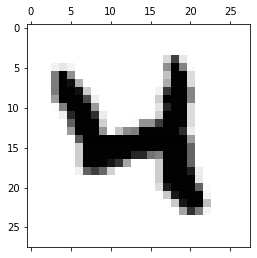

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [23]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

L'utility di Keras *to_categorical* permette di convertire un array di labels suddivisi in classi in una matrice binaria (con entrate 0 o 1) con un numero di colonne tante quante sono le classi del task (10) e righe pari alla dimensione dell'array di partenza (28 x 28 = 784). Questa operazione è fondamentale per poter usare, in seguito, come funzione perdita la *categorical_crossentropy*.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Nella cella precedente è stata definita l'architettura della rete. Si osservi la funzione di attivazione **softmax** nel layer di output che normalizza gli input nell'intervallo $[0,1)$ assegnando una probabilità all'output distribuita tra le 10 classi possibili.

L'operazione di **Dropout** effettua, tramite selezione casuale, uno scollegamento di alcune connesioni tra i neuroni della NN. Questa operazione viene effettuata solamente durante il *training*. Ci si aspettano quindi migliori performance (funzione costo inferiore e accuratezza maggiore) durante il test.

In [25]:
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam  

1) **Stochastich Gradient Descent (SGD)**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='sgd',
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


La funzione **costo** (**loss**) è la *categorical_crossentropy* essendo l'output il risultato di una misura di classificazione.

La **metrica** *accuracy* viene spesso impiegata nei problemi di classificazione e rappresenta la percentuale di dati di apprendimento classificati in modo corretto. 

La metrica, si ricordi, è una misura quantitativa delle performances del modello adottato (un test) ma non influenza in alcun modo l'ottimizzazione del modello.

In [ ]:
# training parameters
batch_size = 32
#epochs = 5 #local run
epochs = 30 #GPU run

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7280 - acc: 0.7886 - val_loss: 0.3028 - val_acc: 0.9178
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3727 - acc: 0.8941 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3016 - acc: 0.9161 - val_loss: 0.1969 - val_acc: 0.9421
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2597 - acc: 0.9276 - val_loss: 0.1722 - val_acc: 0.9478
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2300 - acc: 0.9352 - val_loss: 0.1573 - val_acc: 0.9500
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2070 - acc: 0.9417 - val_loss: 0.1430 - val_acc: 0.9546
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1881 - acc: 0.9471 - val_loss: 0.1302 - val_acc: 0.9580
Epoch 8/30
1875/1875 [==============================] - 6s 3ms

313/313 [==============================] - 1s 2ms/step - loss: 0.0659 - acc: 0.9781

Test loss: 0.06593295186758041
Test accuracy: 0.9781000018119812


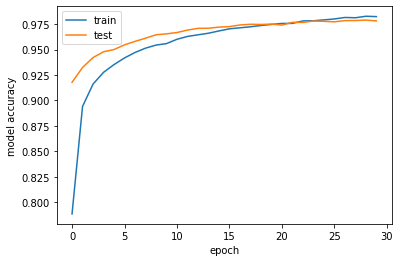

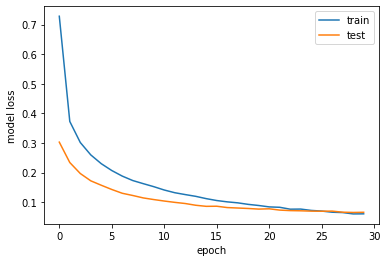

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

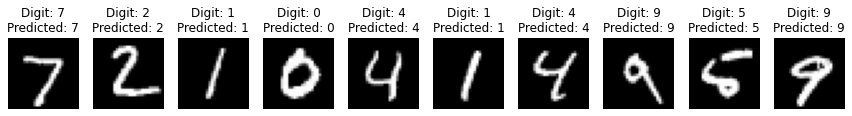

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

- Con sole 5 epoche le performance del SGD sono piuttosto scarse come si mostra nel file *LSN_Exercises_12.ipynb* ($9/10$ predizioni corrette). Bisogna aumentare a 30 le epoche per realizzare la convergenza ed ottenere esiti soddisfacenti come in questo caso ($10/10$ predizioni corrette).

2) **Adam**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2807 - acc: 0.9178 - val_loss: 0.1033 - val_acc: 0.9678
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1206 - acc: 0.9651 - val_loss: 0.0933 - val_acc: 0.9716
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0873 - acc: 0.9747 - val_loss: 0.0804 - val_acc: 0.9767
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - acc: 0.9801 - val_loss: 0.0781 - val_acc: 0.9776
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0557 - acc: 0.9828 - val_loss: 0.0897 - val_acc: 0.9742
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - acc: 0.9863 - val_loss: 0.0873 - val_acc: 0.9784
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - acc: 0.9872 - val_loss: 0.0870 - val_acc: 0.9804
Epoch 8/30
1875/1875 [==============================] - 6s 3ms

313/313 [==============================] - 1s 2ms/step - loss: 0.1672 - acc: 0.9830

Test loss: 0.16723737120628357
Test accuracy: 0.9829999804496765


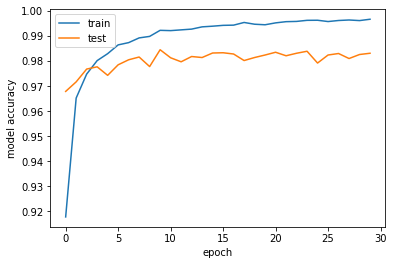

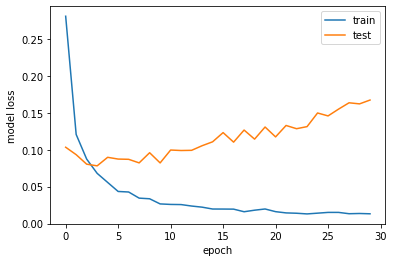

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

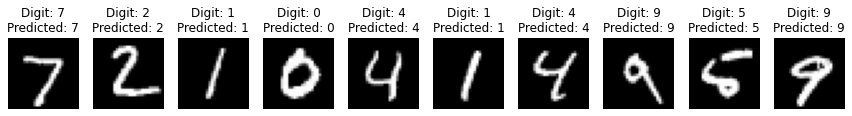

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

3) **Adagrad**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(lr=0.01, decay=0.0),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5105 - acc: 0.8504 - val_loss: 0.2206 - val_acc: 0.9368
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2702 - acc: 0.9235 - val_loss: 0.1656 - val_acc: 0.9507
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2131 - acc: 0.9405 - val_loss: 0.1378 - val_acc: 0.9573
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1779 - acc: 0.9505 - val_loss: 0.1205 - val_acc: 0.9634
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1562 - acc: 0.9567 - val_loss: 0.1107 - val_acc: 0.9656
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1375 - acc: 0.9619 - val_loss: 0.1022 - val_acc: 0.9674
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1247 - acc: 0.9649 - val_loss: 0.0929 - val_acc: 0.9686
Epoch 8/30
1875/1875 [==============================] - 5s 3ms

313/313 [==============================] - 1s 2ms/step - loss: 0.0599 - acc: 0.9821

Test loss: 0.05987202748656273
Test accuracy: 0.9821000099182129


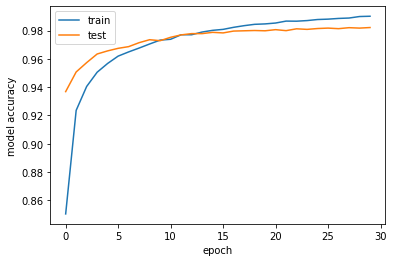

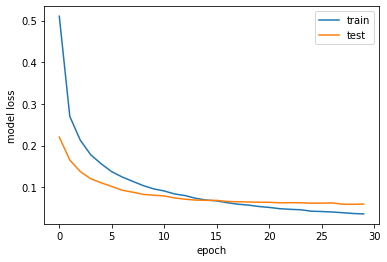

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

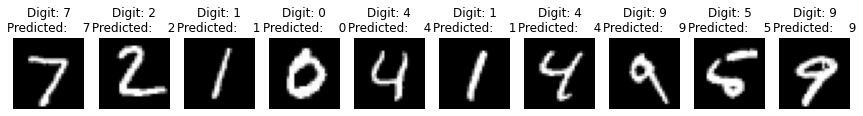

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

4) **Adadelta**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None,  decay=0.0),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2892 - acc: 0.9157 - val_loss: 0.1226 - val_acc: 0.9631
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1307 - acc: 0.9629 - val_loss: 0.0981 - val_acc: 0.9703
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0958 - acc: 0.9726 - val_loss: 0.0864 - val_acc: 0.9748
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - acc: 0.9792 - val_loss: 0.0777 - val_acc: 0.9799
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - acc: 0.9820 - val_loss: 0.0825 - val_acc: 0.9786
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0554 - acc: 0.9845 - val_loss: 0.0830 - val_acc: 0.9785
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0496 - acc: 0.9859 - val_loss: 0.0809 - val_acc: 0.9820
Epoch 8/30
1875/1875 [==============================] - 6s 3ms

313/313 [==============================] - 1s 2ms/step - loss: 0.1392 - acc: 0.9788

Test loss: 0.13919688761234283
Test accuracy: 0.9787999987602234


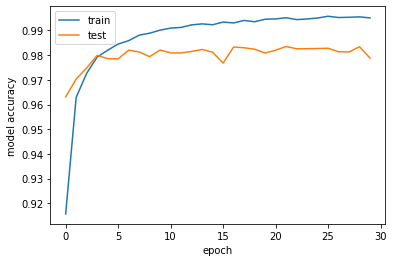

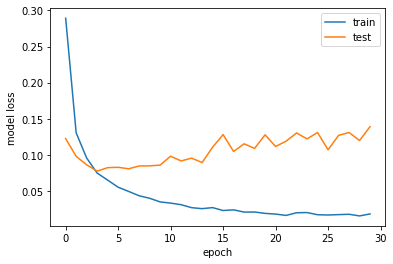

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

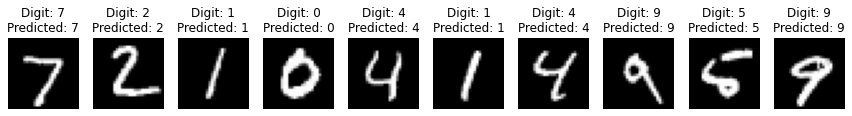

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

5) **Adamax**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3959 - acc: 0.8856 - val_loss: 0.1666 - val_acc: 0.9510
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1966 - acc: 0.9441 - val_loss: 0.1206 - val_acc: 0.9634
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1454 - acc: 0.9589 - val_loss: 0.0971 - val_acc: 0.9701
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1153 - acc: 0.9671 - val_loss: 0.0851 - val_acc: 0.9737
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - acc: 0.9736 - val_loss: 0.0787 - val_acc: 0.9744
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0812 - acc: 0.9769 - val_loss: 0.0744 - val_acc: 0.9763
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0702 - acc: 0.9800 - val_loss: 0.0677 - val_acc: 0.9787
Epoch 8/30
1875/1875 [==============================] - 6s 3ms

313/313 [==============================] - 1s 2ms/step - loss: 0.0618 - acc: 0.9842

Test loss: 0.061823438853025436
Test accuracy: 0.9842000007629395


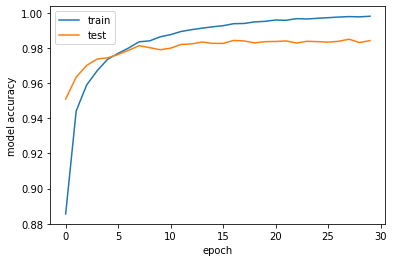

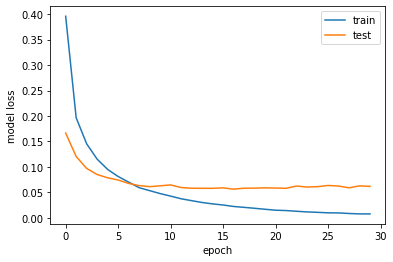

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

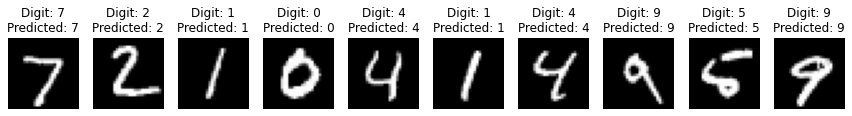

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

6) **Nadam**

In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2806 - acc: 0.9182 - val_loss: 0.1145 - val_acc: 0.9638
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1193 - acc: 0.9663 - val_loss: 0.0882 - val_acc: 0.9727
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0858 - acc: 0.9750 - val_loss: 0.0902 - val_acc: 0.9730
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0671 - acc: 0.9801 - val_loss: 0.0858 - val_acc: 0.9767
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0575 - acc: 0.9828 - val_loss: 0.0878 - val_acc: 0.9763
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0482 - acc: 0.9854 - val_loss: 0.0855 - val_acc: 0.9771
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0431 - acc: 0.9870 - val_loss: 0.0920 - val_acc: 0.9772
Epoch 8/30
1875/1875 [==============================] - 7s 4ms

313/313 [==============================] - 1s 2ms/step - loss: 0.1663 - acc: 0.9816

Test loss: 0.1663108468055725
Test accuracy: 0.9815999865531921


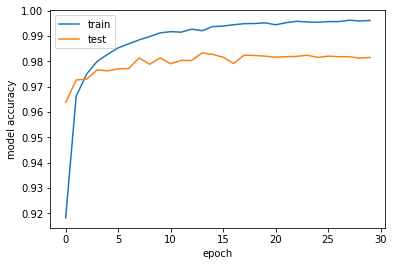

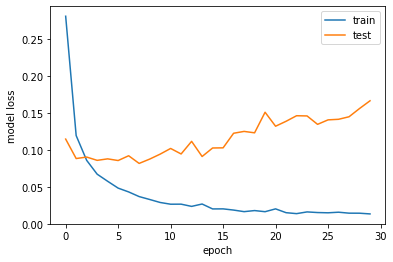

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

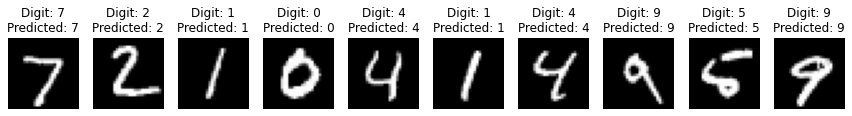

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

- Tutti i test degli ottimizzatori sono stati svolti su un numero di epoche di apprendimento pari a $N_{epoch} = 30$ per eseguire dei confronti relativi alle performances interpretando i risultati ottenuti con il **loss test** e l'**accuracy test** e valutando i rispettivi andamenti in funzione del numero di epoche. Tutti gli ottimizzatori vengono utilizzati con i loro parametri di default, per avere un giudizio *unbiased*. Risulta ovvio sottolineare che modificando opportunamente i parametri le performance possono variare.
Le performances sono infatti fortemente influenzate dalla scelta degli argomenti degli ottimizzatori, in particolare del valore del *learning rate* che gioca un ruolo
molto importante ai fini dell'efficienza e della convergenza dell'algoritmo. 

1.  **SGD**: ottime performance. Valori della funzione costo in continua decrescita e accuratezza che continua a crescere nel corso delle epoche. 
Come ci si aspetta $E_{in} > E_{out}$, dato che l'operazione di Dropout viene performata solamente sui dati di training. 
2.   **Adam**: raggiunge migliori performances sia in termini di loss che di accuracy nelle prime 10 epoche con una convergenza rapida, dopodichè inizia ad overfittare i dati ($E_{out}$ cambia monotonia).
3.   **Adagrad**: performa meglio di SGD e Adam, tuttavia, al contrario dell'ultimo non presenta overfitting.
4.   **Adadelta**: sulla stessa lunghezza d'onda di Adam ma con performances decisamente migliori (convergenza in 8 epoche), come per Adam dopo il minimo della loss function inizia ad overfittare.
5.   **Adamax**: presenta performance intermedie tra SGD e Adagrad. Non presenta alcun tipo di overfitting. 
6.   **Nadam**: Una convergenza rapidissima: poco più di 6 epoche prima di inziare a mostrare segni di overfitting. 

**N.B.** Avendo un numero di epoche adeguato tutti gli esperimenti di previsione hanno dato un esito corretto. 

### Esercizio 12.2: Reti Neurali Convoluzionali (CNNs)

Nel secondo esercizio è richiesto di arricchire e modificare l'archittettura della precedente DNN aggiungendo dei layer convoluzionali per sfruttare la presenza di **correlazioni spaziali locali** tra i pixel nelle immagini  e le proprietà di **invarianza traslazionale** al fine di migliorare l'accurattezza del modello di classificazione.

In [26]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Per costruire la nuova rete neurale convoluzionale sono stati introdotti sia layers convoluzionali caratterizzati da un certo numero di filtri di dimensioni opportune, sia pooling layers di tipo **Maxpooling** che riducono le dimensioni degli outputs (meno parametri) mantenendo invariata la profondità (il numero di canali), sia un **Flatten** layer che rettifica i dati in un array unidimensionale.

L'architettura della rete neurale convoluzionale scelta per migliorare l'accuratezza del modello di classificazione è la seguente:

- Un primo layer convoluzionale 2D composto da 10 filtri (la dimensione dello spazio di output) $5 \times 5$ con l'argomento opzionale *input_shape* che specifica la dimensione  e la forma dell'input del primo starto del modello ($28 \times 28 \times 1$) e con funzione di attivazione *RELU*. L'output, dopo l'operazione di convoluzione, diventerà un immagine $24 \times 24 \times 10$.  

- Un primo layer MaxPooling 2D con un filtro $2 \times 2$ per dimezzare la dimensione e sgranare l'immagine sostituendo le regioni progressivamente "investite" dal filtro ($2 \times 2$ neuroni appunto) con un solo neurone di cui l'output è il maggior valore tra gli outputs presenti nella regione. Viene inoltre settato uno **stride** $S=2$ in modo tale che il filtro esplori pixels dell'immagine sempre diversi. Dimensione output finale $12 \times 12 \times 10$.
Il MaxPooling è utile perchè riduce il rischio di *overfitting* (meno parametri) e conserva le aree di maggiore attivazione.

- Un secondo layer convoluzionale 2D da 18 filtri $3 \times 3$ con funzione di attivazione Relu. Dimensioni dell'output $10 \times 10 \times 18$.

- Un secondo layer MaxPooling 2D con un filtro $2 \times 2$ e stride $S=2$. Dimensioni dell'output $5 \times 5 \times 18$.

- Un *flatten* layer che rettifica i dati un array unidimensionale (srotola la matrice).

- Un primo layer **denso** costiutito da $450 = 5 \times 5 \times 18$ neuroni con funzione di attivazione relu.

- Un secondo layer denso composto da $50 neuroni$ con funzione di attivazione relu.

- Un **Dropout** con rate $0.3$. Tale operazione aiuta a prevenire il rischio di overfitting silenziando casualmente alcuni neuroni ad ogni aggiornamento durante la fase di allenamento.

- Un layer di ouput con funzione di attivazione **softmax** con $10$ (digits) output possibili.

Di seguito è riportata l'implementazione, l'allenamento e le predizioni del modello sopra descritto.

In [27]:
def create_CNN():
    # instantiate model
    model = Sequential() # 28 x 28 x 1
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape)) # 24 x 24 x 10
    # add first MaxPooling layer with strides = 2
    model.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid')) # 12 x 12 x 10
    #add second convolutional layer with 18 filters
    model.add(Conv2D(18, kernel_size=(3, 3),activation='relu')) # 10 x 10 x 18
    # add second MaxPooling layer with strides = 2
    model.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid')) # 5 x 5 x 18
    #add flatten layer
    model.add(Flatten())
    # add first standard dense layer with 
    model.add(Dense(450, activation='relu'))
    # add second standard dense layer with 
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.3
    model.add(Dropout(0.3))
    # add soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    return model
print('Model architecture created successfully!')

Model architecture created successfully!


In [28]:
def compile_model():
        # create the model
        model=create_CNN()
        # compile the model
        model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(learning_rate=0.01, decay=0.0),
                  metrics=['acc'])
        return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Sulla base di quanto appreso in *Esercizio 12.1* utilizziamo come ottimizzatore **Adagrad** con parametri di default. Il numero di epoche rimane $N_{epoch} = 30$.

In [ ]:
# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_CNN = compile_model()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Epoch 1/30
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4441 - acc: 0.8587 - val_loss: 0.0977 - val_acc: 0.9696
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1413 - acc: 0.9586 - val_loss: 0.0676 - val_acc: 0.9799
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1039 - acc: 0.9700 - val_loss: 0.0549 - val_acc: 0.9825
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - acc: 0.9756 - val_loss: 0.0515 - val_acc: 0.9840
Epoch 5/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0747 - acc: 0.9783 - val_loss: 0.0442 - val_acc: 0.9863
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0666 - acc: 0.9808 - val_loss: 0.0442 - val_acc: 0.9855
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - acc: 0.9821 - val_loss: 0.0382 - val_acc: 0.9883
Epoch 8/30
1875/1875 [==============================] - 7s 4m

313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - acc: 0.9916

Test loss: 0.029218286275863647
Test accuracy: 0.991599977016449


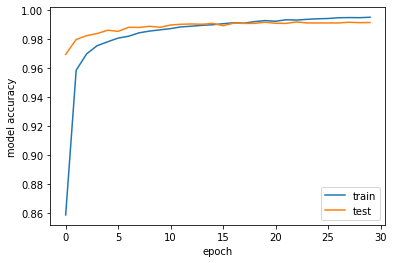

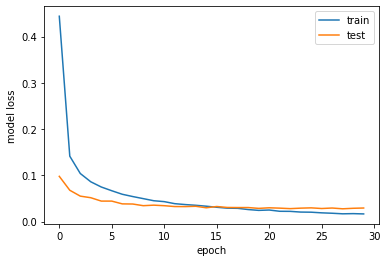

In [29]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()



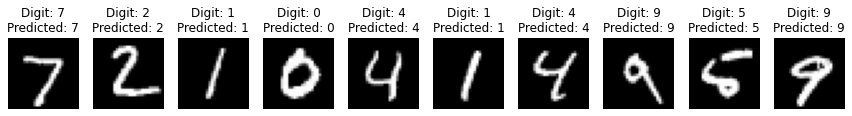

In [30]:
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()


- Le performances di questa rete sono decisamente molto buone. La funzione costo converge molto più rapidamente e a valori inferiori rispetto a tutti i modelli di DNN utilizzati sopra. L'accuratezza risulta anch'essa notevolmente migliorata.

- Le predizioni del modello sui dati di allenamento sono infallibili (vedi ultima cella).

- Nonostante tutti gli accorgimenti il modello possiede molti più parametri e quindi, con un numero di epoche simili, richiede molto più tempo il suo allenamento.

- Sono state usate un numero di epoche $N_{epoch} = 30$, necessarie per arrivare a convergenza ma senza cadere nella *trappola* dell'overfitting, nonstante la non perfetta monotonia della *loss* function, che indica una tendenza a cadere nell'overfitting probabilmente smorzata dall'operazione di Dropout. 

### Esercizio 12.3

Nell'ultimo esercizio è richiesto di testare se la rete convoluzionale precedentemente costruita ed allenata sia in grado di riconoscere delle cifre scritte a mano create con l'applicazione *gimp*.

In [31]:
from google.colab import files
from IPython.display import Image


In [32]:
upload = files.upload()

Saving 9.png to 9.png
Saving 8.png to 8.png
Saving 7.png to 7.png
Saving 6.png to 6.png
Saving 5.png to 5.png
Saving 4.png to 4.png
Saving 3.png to 3.png
Saving 2.png to 2.png
Saving 1.png to 1.png
Saving 0.png to 0.png


**N.B.**: avendo usato colab per questa esercitazione, qui sopra ho scritto un paio di celle per importare e caricare i file contenenti le immagini.

Image size: 28x28


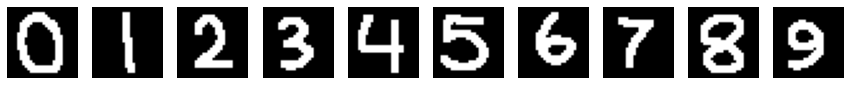

In [40]:
from PIL import Image
import os

#path = "Pictures/"
#if it is a local run add path to the filename

for k in range(10):
  digit_filename = str(k) + ".png"
  digit_in = Image.open(digit_filename).convert('L')
  ydim, xdim = digit_in.size
  pix=digit_in.load();
  for j in range(ydim):
    for i in range(xdim):
        data[k,i,j]=pix[j,i]/255


print("Image size: "+str(xdim)+"x"+str(ydim))

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :], cmap='gray')        
    plt.axis('off') 
plt.show()



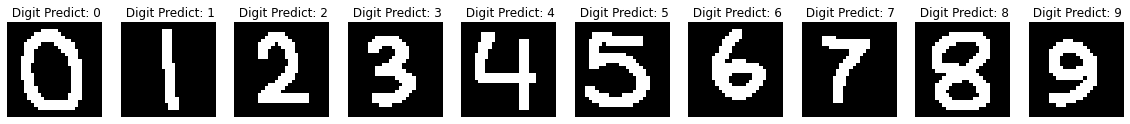

In [41]:
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


predictions = model_CNN.predict(data)
plt.figure(figsize=(20, 20)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title(" Digit Predict: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


- La rete neurale convoluzionale sviluppata riconosce tutte le cifre scritte a mano dimostrandosi molto performativa persino nell'effettuare predizioni su digit mai visti, sui quali non è stata trainata.